Compare different inter-cluster distances

exception in get ordered ids
exception in get ordered ids
exception in get ordered ids
exception in get ordered ids
exception in get ordered ids
ward


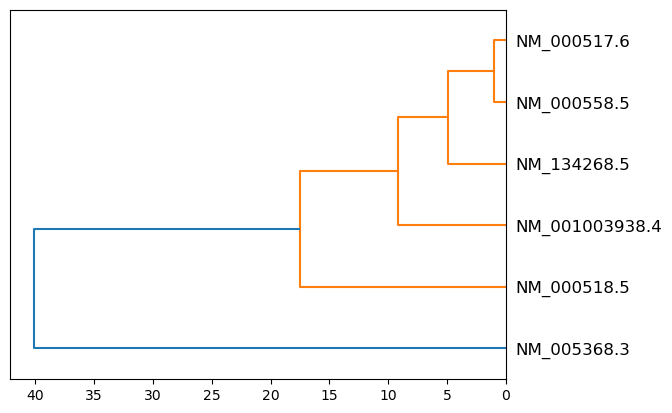

single


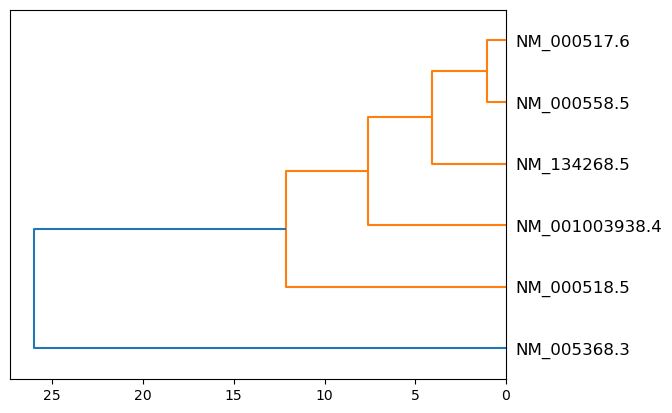

complete


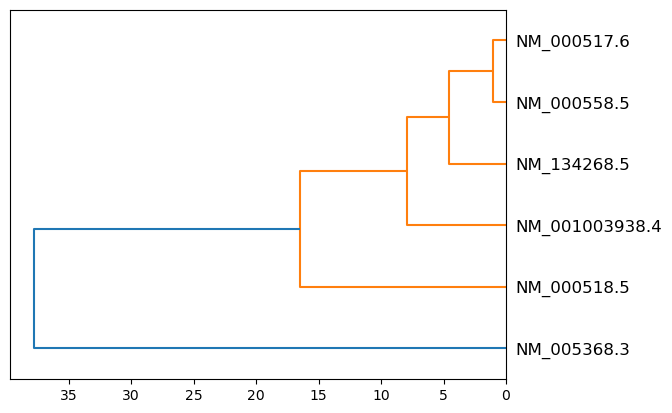

centroid


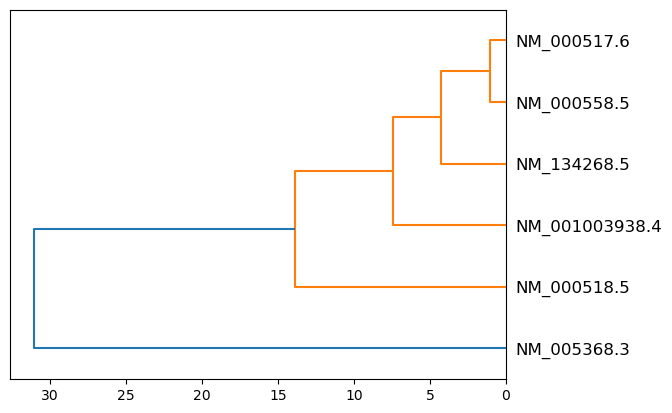

median


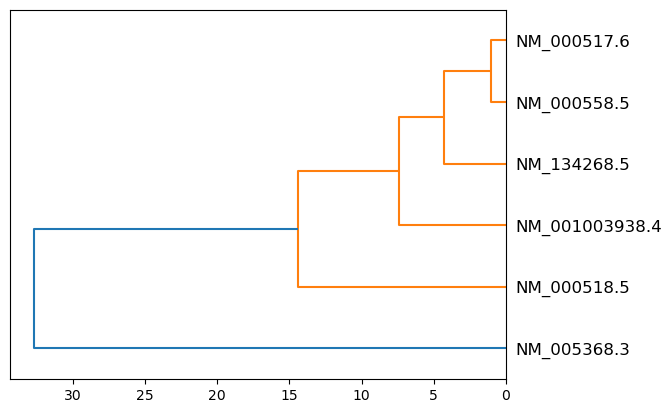

weighted


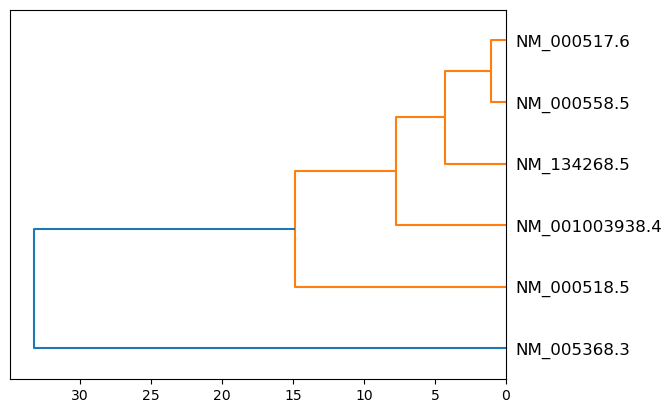

average


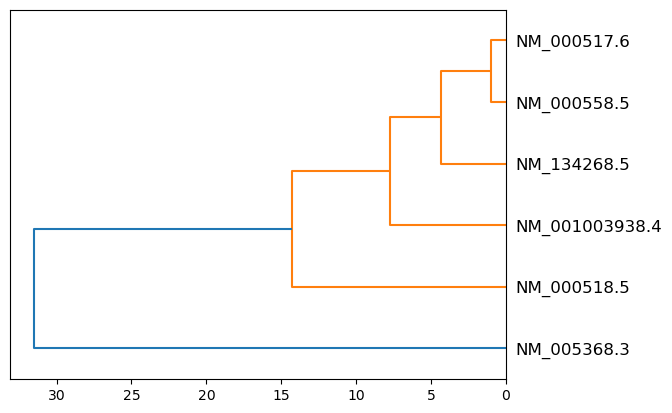

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import utils
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
from autoembedding.embeddings_matrix import build_embeddings_matrix
#InteractiveShell.ast_node_interactivity = "all"

#PATH = "dataset/NEIS2157.json"
PATH = "dataset/globins/globins.json"

embeddings_dict = utils.get_embeddings_dict(PATH)

IDs, embeddings_matrix = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="prose",
    combiner_method="average"
)

methods = ["ward", "single", "complete", "centroid", "median", "weighted", "average"]

condensed_distances = pdist(embeddings_matrix)

for method in methods:
    print(method)
    # Perform hierarchical clustering
    Z = linkage(condensed_distances, method=method)
    # Plot dendrogram
    dendrogram(Z, orientation="left", labels=IDs)

    plt.show()

# Get cluster labels
#max_d =30  # set the maximum distance between clusters
#labels = fcluster(Z, max_d, criterion='distance')
#print(labels)

INFO  : Finished optimising at entanglement 0.06 (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


exception in get ordered ids
exception in get ordered ids
exception in get ordered ids
exception in get ordered ids
exception in get ordered ids
['NM_000517.6', 'NM_000518.5', 'NM_000558.5', 'NM_001003938.4', 'NM_005368.3', 'NM_134268.5'] ['NM_000558.5', 'NM_000517.6', 'NM_001003938.4', 'NM_000518.5', 'NM_134268.5', 'NM_005368.3']


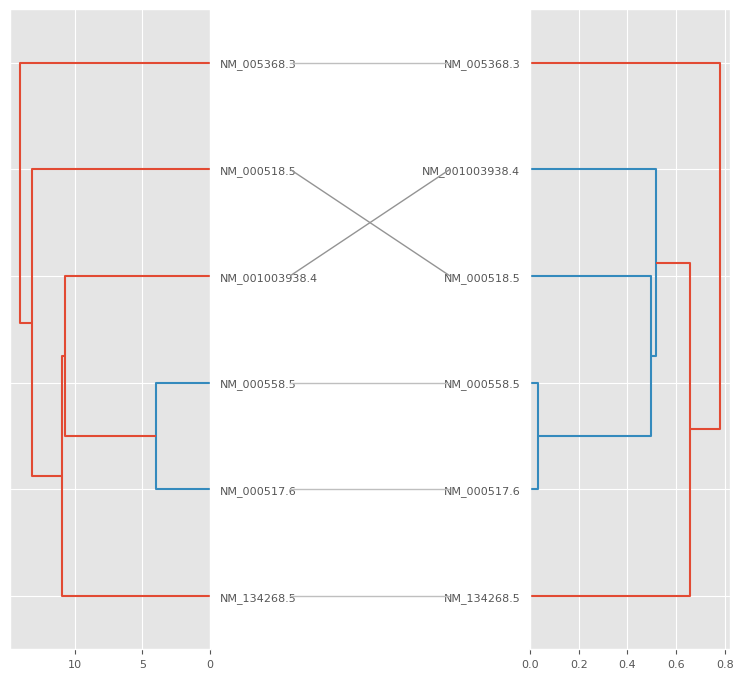

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tanglegram as tg

# Building the embedding matix
IDs, embeddings_matrix_A = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="rep",
    combiner_method="none"
)

# Scaling
scaler = StandardScaler()
embeddings_matrix_A = scaler.fit_transform(embeddings_matrix_A)

# Principal component analysis
pca = PCA(n_components=5)
embeddings_matrix_A = pca.fit_transform(embeddings_matrix_A)

# Buliding an array encoding the pairwise distances between rows (observations) in the embedding matrix
condensed_distances_A = pdist(embeddings_matrix_A, metric="euclidean")

# Calculating the hierarchical clustering 
linkage_matrix_A = linkage(condensed_distances_A, method="average", optimal_ordering=True)

gt_matrix, gt_IDs = utils.newick_to_linkage("dataset/globins/globins.dnd")

# Plot tanglegram   
fig = tg.plot(
    linkage_matrix_A, 
    gt_matrix,
    labelsA=IDs,
    labelsB=gt_IDs,
    #sort="step2side", 
    link_kwargs = {},
    dend_kwargs={}
)

#plt.show()
print(gt_IDs, IDs)

In [37]:
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import adjusted_rand_score

n_clusters = 4

gt_labels = cut_tree(gt_matrix, n_clusters=n_clusters)
print(gt_labels)
gt_labels = [l[0] for l in gt_labels]

pred_labels = cut_tree(linkage_matrix_A, n_clusters=n_clusters)
print(pred_labels)
pred_labels = [l[0] for l in pred_labels ]

adjusted_rand_score(labels_true=gt_labels, labels_pred=pred_labels)


ValueError: Linkage 'Z' contains negative indices.

Phylogenetic tree with clustalw2

In [5]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import Phylo
import utils
from ete3 import ClusterTree

#cmd =  ClustalwCommandline("clustalw2", infile="dataset/NEIS2157.fasta", outfile="dataset/NEIS2157_aligned.aln")
#stdout, stderr = cmd()
#tree = Phylo.read("dataset/NEIS2157.dnd", format="newick")



{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375]],
 'dcoord': [[0.0, 0.03299, 0.03299, 0.0],
  [0.0, 0.49493, 0.49493, 0.03299],
  [0.0, 0.51761, 0.51761, 0.49493],
  [0.0, 0.65804, 0.65804, 0.51761],
  [0.0, 0.78171, 0.78171, 0.65804]],
 'ivl': ['NM_005368.3',
  'NM_134268.5',
  'NM_001003938.4',
  'NM_000518.5',
  'NM_000517.6',
  'NM_000558.5'],
 'leaves': [4, 5, 3, 1, 0, 2],
 'color_list': ['C1', 'C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1', 'C1']}

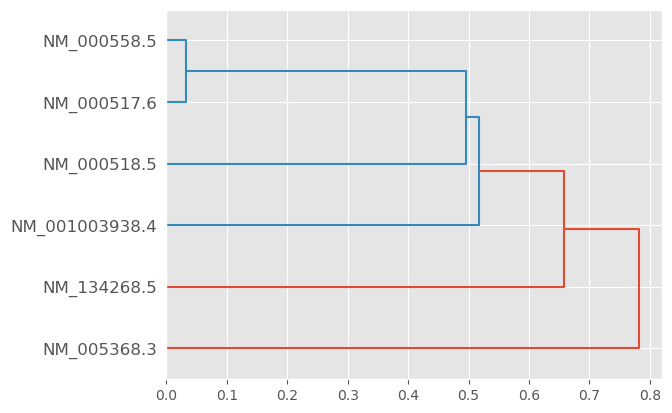

In [9]:


#dendrogram(l_matrix, labels= IDsNW, orientation="right")

INFO  : Finished optimising at entanglement 0.06 (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


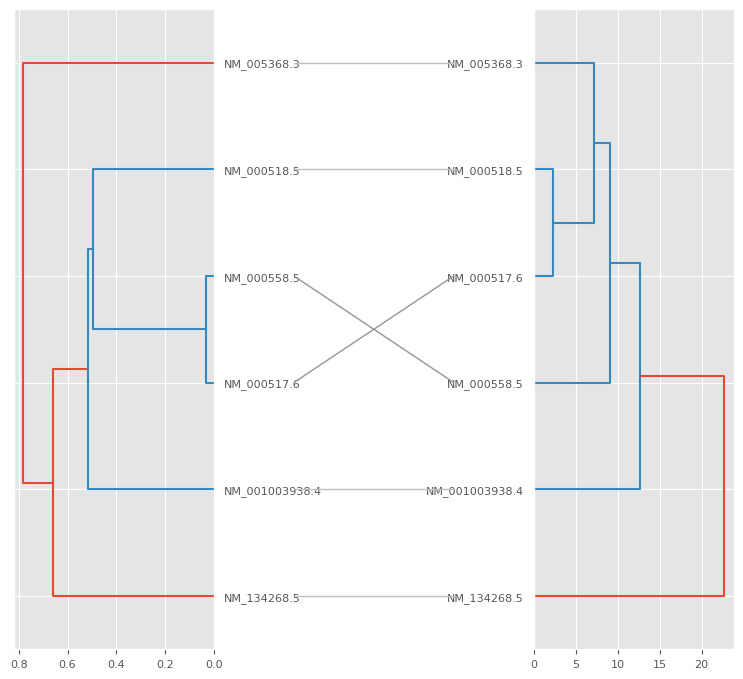

In [10]:
fig = tg.plot(
    l_matrix, 
    linkage_matrix_B,
    labelsA=IDsNW,
    labelsB=IDs,
    sort="step2side", 
    link_kwargs = {},
    dend_kwargs={}
)